# Exploratory Data Analysis

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat

In [119]:
train_data = pd.read_csv('../data/raw/fraudTrain.csv')
test_data = pd.read_csv('../data/raw/fraudTest.csv')

In [120]:
# Chekcing for missing values
print(train_data.isnull().sum().sum())

# Checking for duplicates
print(train_data.duplicated().sum().sum())

0
0


In [121]:
# Checking how many fraudulent transactions per person 
print(train_data.groupby('cc_num')['is_fraud'].sum())

print(test_data.groupby('cc_num')['is_fraud'].sum())

cc_num
60416207185             9
60422928733            12
60423098130            10
60427851591            14
60487002085             0
                       ..
4958589671582726883     0
4973530368125489546    10
4980323467523543940    10
4989847570577635369     0
4992346398065154184     8
Name: is_fraud, Length: 983, dtype: int64
cc_num
60416207185             0
60422928733             0
60423098130             0
60427851591             0
60487002085             8
                       ..
4958589671582726883     7
4973530368125489546     0
4980323467523543940     0
4989847570577635369    15
4992346398065154184     0
Name: is_fraud, Length: 924, dtype: int64


In [122]:
# Loading the processed data
train_data = pd.read_csv('../data/processed/processed_train.csv')
test_data = pd.read_csv('../data/processed/processed_test.csv')

### Summarizing the data

In [123]:
train_data.describe()

,credit_card_number,amount(usd),zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour_of_day,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,4.602930e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,1.738237e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,1.400000e+01
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,3.300000e+01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,4.400000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,5.700000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,9.600000e+01


is_fraud
0    1289169
1       7506
Name: count, dtype: int64


(array([1289169.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    7506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

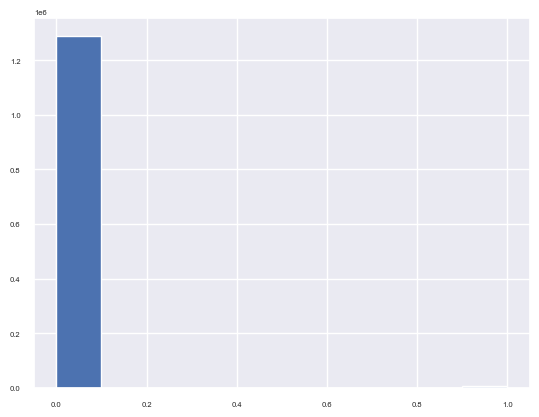

In [124]:
# Checking distribution of the target variable
print(train_data['is_fraud'].value_counts())

#Plotting the distribution of the target variable
plt.hist(train_data['is_fraud'])

We can see here that the dataset is pretty much unbalanced

<Axes: xlabel='transaction_time'>

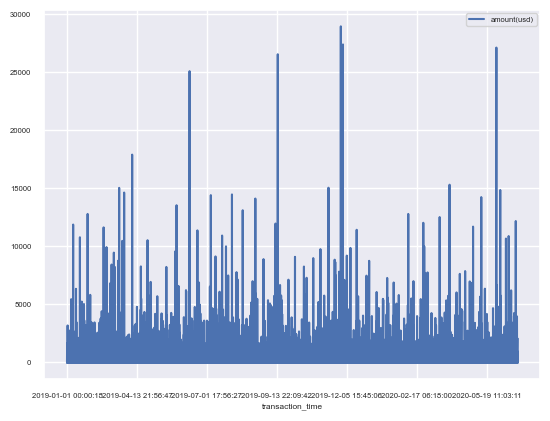

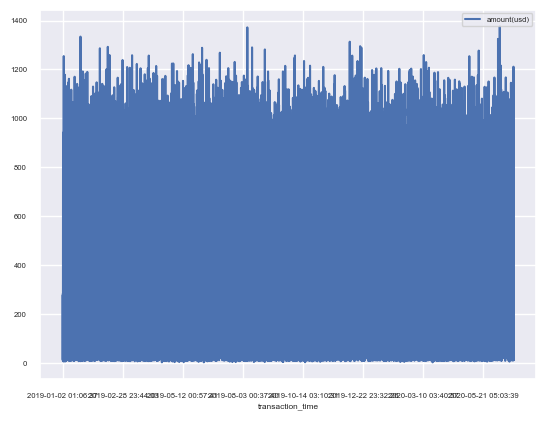

In [125]:
train_data[train_data['is_fraud'] == 0].plot(x='transaction_time', y='amount(usd)', kind='line')
train_data[train_data['is_fraud'] == 1].plot(x='transaction_time', y='amount(usd)', kind='line')

/var/folders/yp/5pnz3r097rvdx8l3b0n_3lqm0000gn/T/ipykernel_78681/1843647357.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



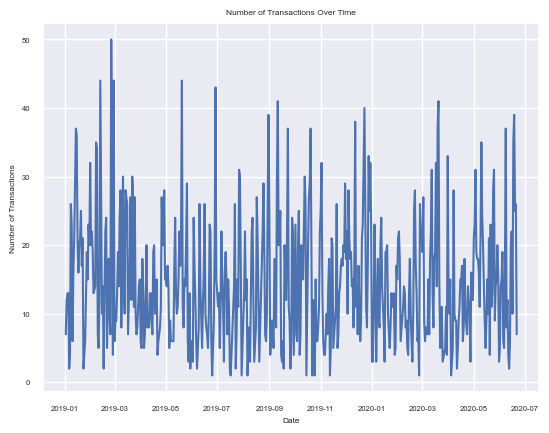

In [126]:
fraud_transactions = train_data[train_data['is_fraud'] == 1]
non_fraud_transactions = train_data[train_data['is_fraud'] == 0]

# Number of transactions over time
fraud_transactions['transaction_time'] = pd.to_datetime(fraud_transactions['transaction_time'])
fraud_transactions.groupby(fraud_transactions['transaction_time'].dt.date)['transaction_time'].count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.show()

/var/folders/yp/5pnz3r097rvdx8l3b0n_3lqm0000gn/T/ipykernel_78681/2986284866.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



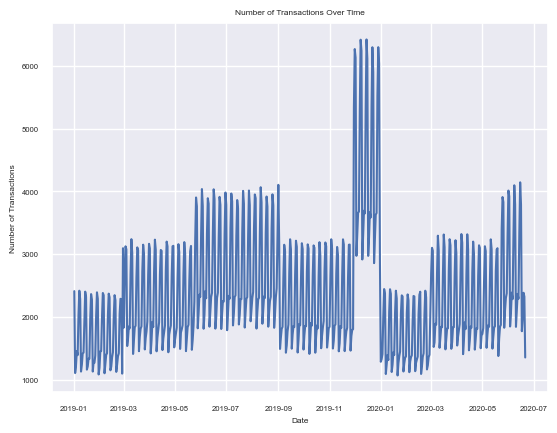

In [127]:
non_fraud_transactions['transaction_time'] = pd.to_datetime(non_fraud_transactions['transaction_time'])
non_fraud_transactions.groupby(non_fraud_transactions['transaction_time'].dt.date)['transaction_time'].count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.show()

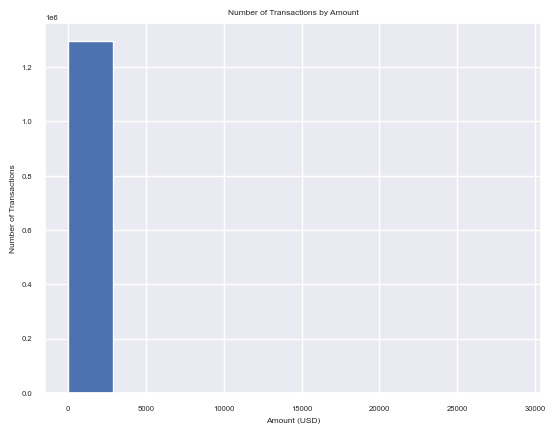

In [128]:

plt.hist(train_data['amount(usd)'])
plt.xlabel('Amount (USD)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Amount')
plt.show()

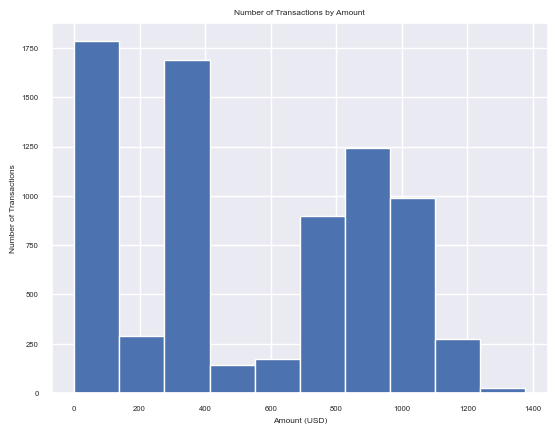

In [129]:
plt.hist(fraud_transactions['amount(usd)'])
plt.xlabel('Amount (USD)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Amount')
plt.show()

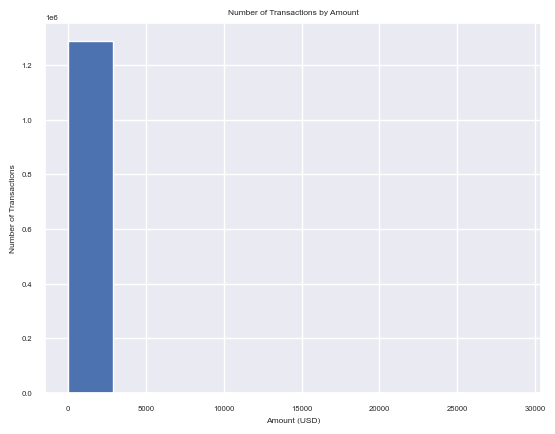

In [130]:
plt.hist(non_fraud_transactions['amount(usd)'])
plt.xlabel('Amount (USD)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Amount')
plt.show()

<Axes: xlabel='job'>

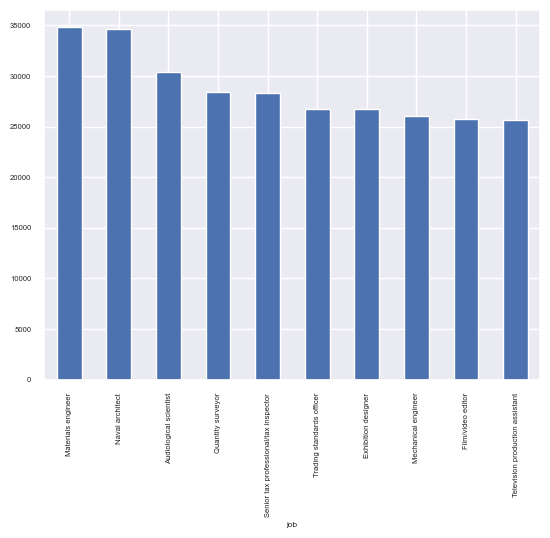

In [131]:
# Jobs with most fraud transactions and respective ammounts     
fraud_transactions.groupby('job')['amount(usd)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')



<Axes: xlabel='credit_card_number'>

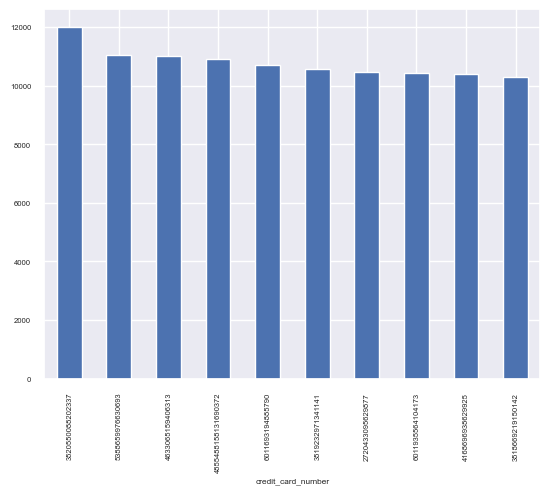

In [132]:
# Credit card number and holder with most fraud transactions
fraud_transactions.groupby('credit_card_number')['amount(usd)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='transaction_time'>

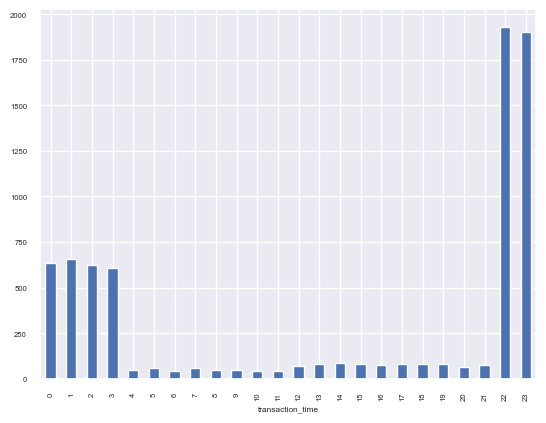

In [133]:
# Counting fraud transactions by hour of the day 
fraud_transactions.groupby(fraud_transactions['transaction_time'].dt.hour)['transaction_time'].count().plot(kind='bar')

### Checking Correlation in the Dataset

In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   transaction_time    1296675 non-null  object 
 1   credit_card_number  1296675 non-null  int64  
 2   merchant            1296675 non-null  object 
 3   category            1296675 non-null  object 
 4   amount(usd)         1296675 non-null  float64
 5   first               1296675 non-null  object 
 6   last                1296675 non-null  object 
 7   gender              1296675 non-null  object 
 8   street              1296675 non-null  object 
 9   city                1296675 non-null  object 
 10  state               1296675 non-null  object 
 11  zip                 1296675 non-null  int64  
 12  lat                 1296675 non-null  float64
 13  long                1296675 non-null  float64
 14  city_pop            1296675 non-null  int64  
 15  job            

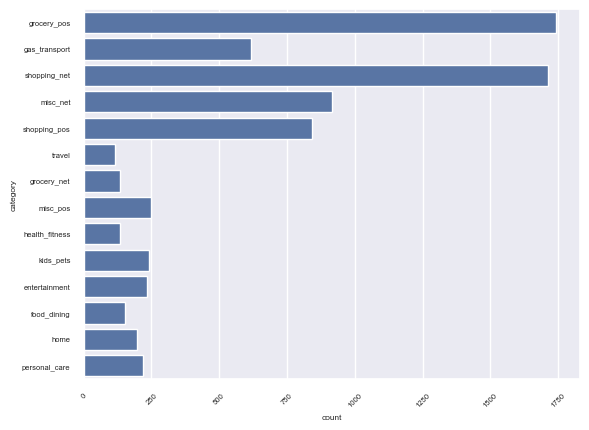

In [135]:
sns.countplot(train_data[train_data['is_fraud']==1].category)
plt.xticks(rotation=45)
plt.show()

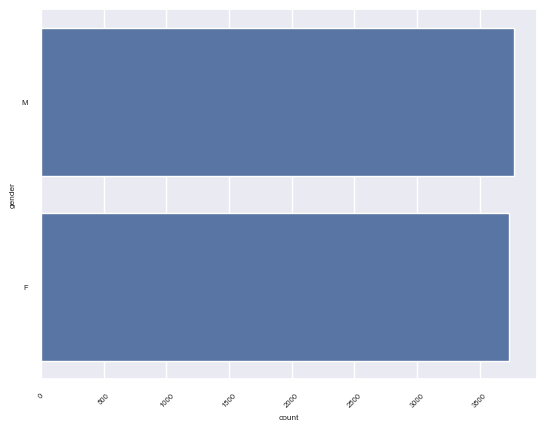

In [136]:
sns.countplot(train_data[train_data['is_fraud']==1].gender)
plt.xticks(rotation=45)
plt.show()

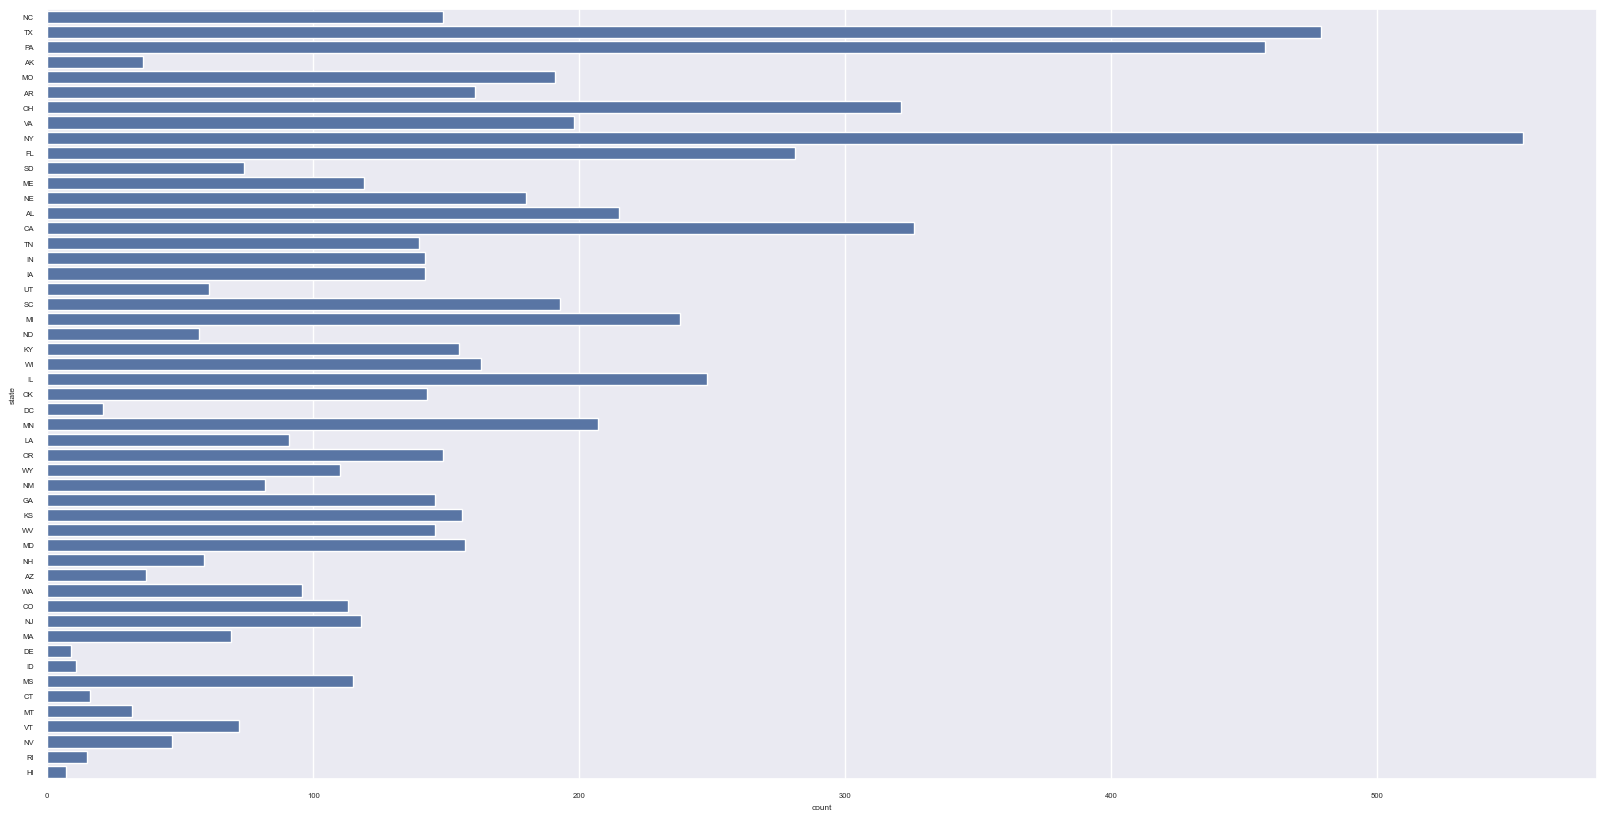

In [137]:
# Plotting  fraud count plot by state
#reduce font
sns.set(font_scale=0.5)
plt.figure(figsize=(20,10))
sns.countplot(train_data[train_data['is_fraud']==1].state)
plt.show()

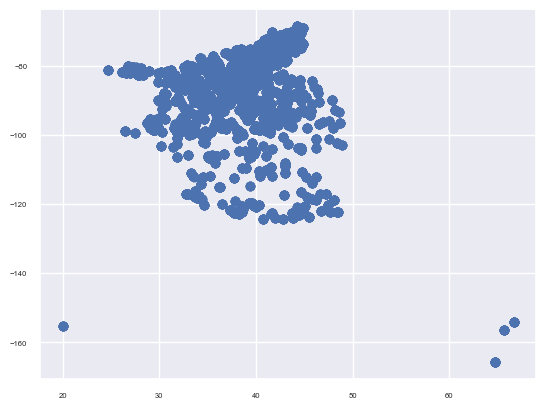

In [138]:
# Checking fraud transactions by latitude and longitude
plt.scatter(fraud_transactions['lat'], fraud_transactions['long'])

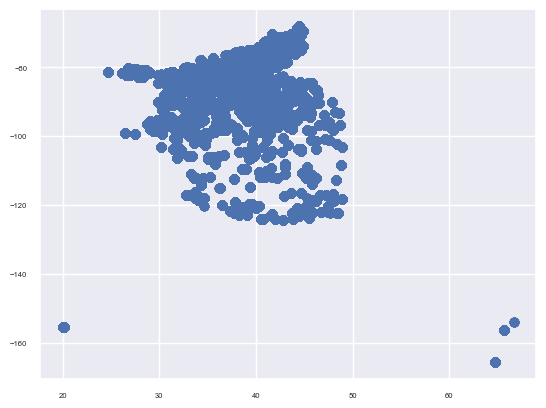

In [139]:
# Checking transactions by latitude and longitude\
plt.scatter(train_data['lat'], train_data['long'])

(array([ 324., 1038., 1075.,  936., 1180., 1103.,  670.,  444.,  423.,
         313.]),
 array([14., 22., 30., 38., 46., 54., 62., 70., 78., 86., 94.]),
 <BarContainer object of 10 artists>)

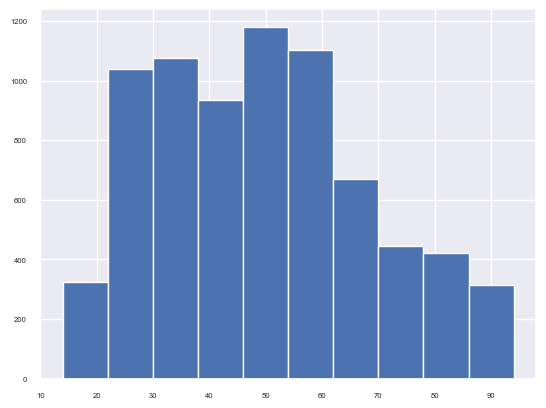

In [140]:
# Checking fraud transactions by age
plt.hist(fraud_transactions['age'])

<Axes: xlabel='merchant'>

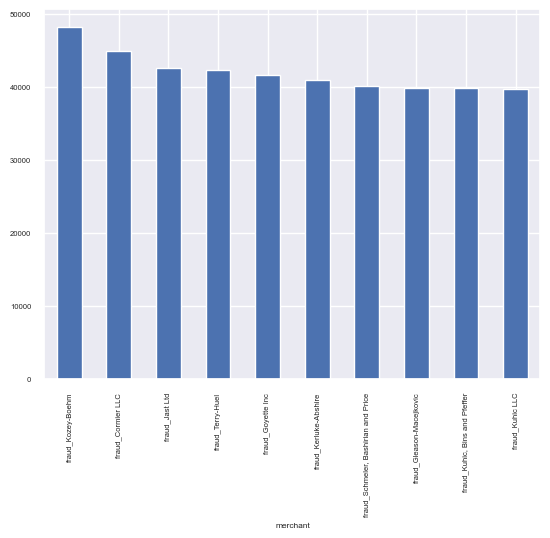

In [142]:
# Checking transactions by merchant
fraud_transactions.groupby('merchant')['amount(usd)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='count', ylabel='merchant'>

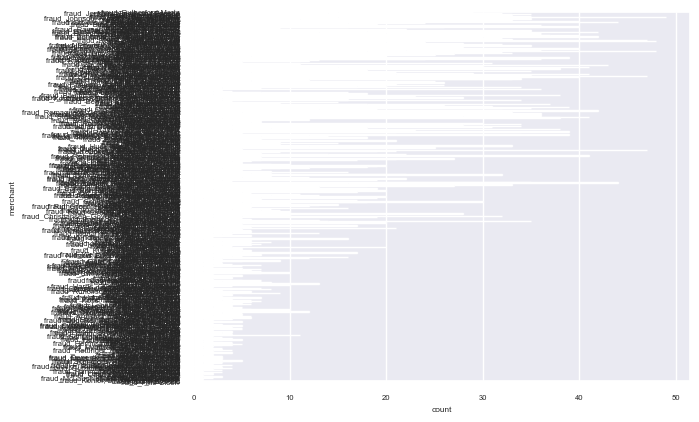

In [143]:
# Fraud transactions by merchant 
sns.countplot(fraud_transactions['merchant'])

<Axes: xlabel='count', ylabel='job'>

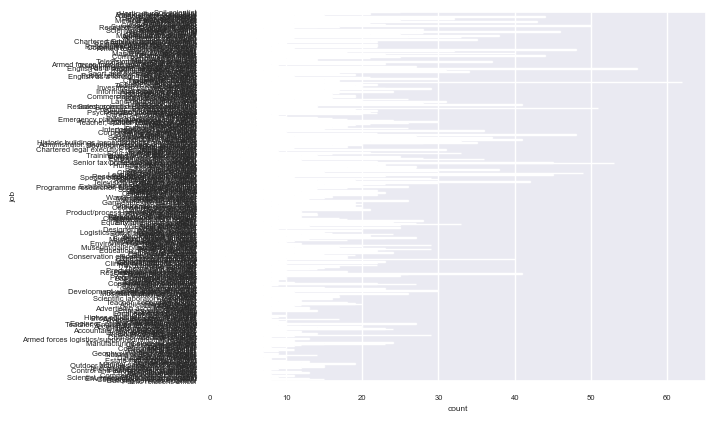

In [144]:
# By job
sns.countplot(fraud_transactions['job'])